In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

In [75]:
df = pd.read_csv('Downloads/Python_Diwali_Sales_Analysis-main/Diwali Sales Data.csv', encoding= 'unicode_escape')

In [76]:
df.shape

(11251, 15)

In [77]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [79]:
df.drop(['Status' , 'unnamed1' ], axis=1, inplace=True)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [81]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [82]:
df.dropna(inplace=True)

In [83]:
df.shape

(11239, 13)

In [84]:
# Exploratory Data Analysis
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

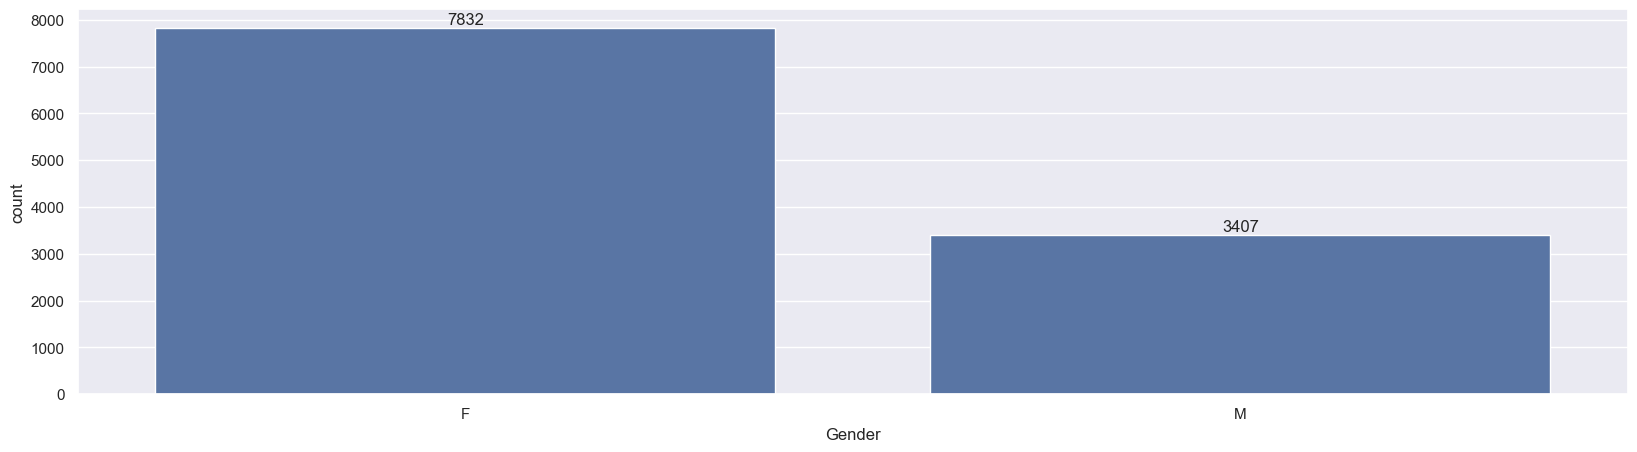

In [85]:
ax = sns.countplot(x = 'Gender' ,data = df)

for bars in ax.containers:
    ax.bar_label(bars)

In [86]:
df.groupby(['Gender' ], as_index=False)['Amount'].sum().sort_values(by='Amount' , ascending=False)

,Gender,Amount
0,F,74335856.43
1,M,31913276.00


<Axes: xlabel='Gender', ylabel='Amount'>

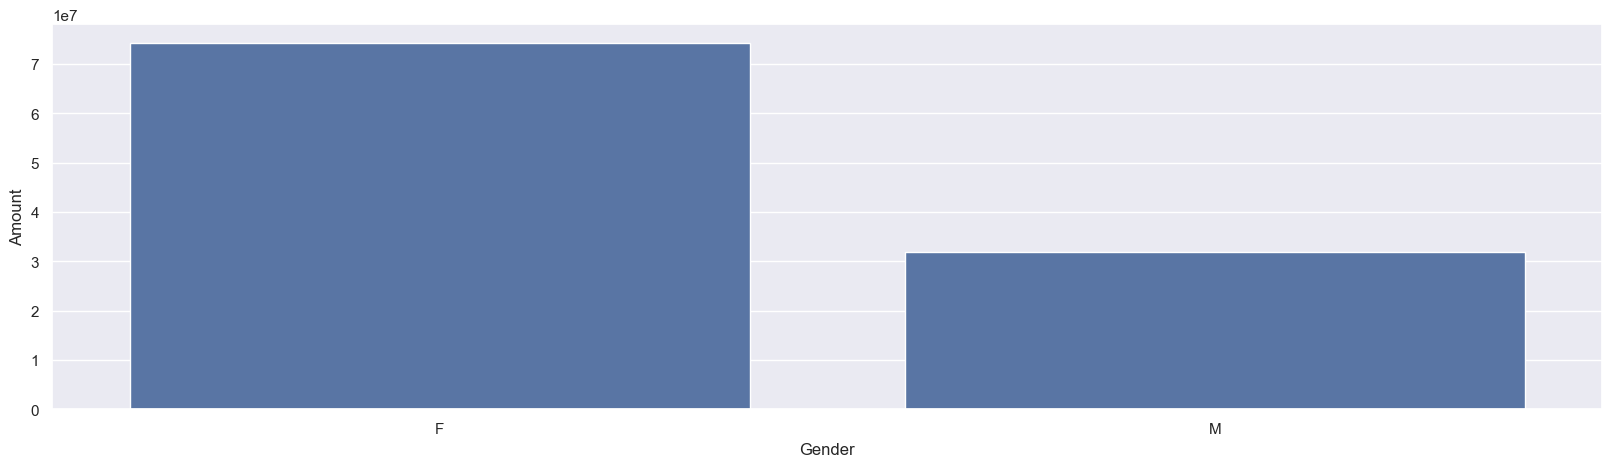

In [87]:
sales_gen  = df.groupby(['Gender' ], as_index=False)['Amount'].sum().sort_values(by='Amount' , ascending=False)
sns.barplot(x = 'Gender' ,y= 'Amount' ,data = sales_gen)

In [88]:

#from above graph we see that most of the buyers are females and even the purchasing power of the females are greater than man


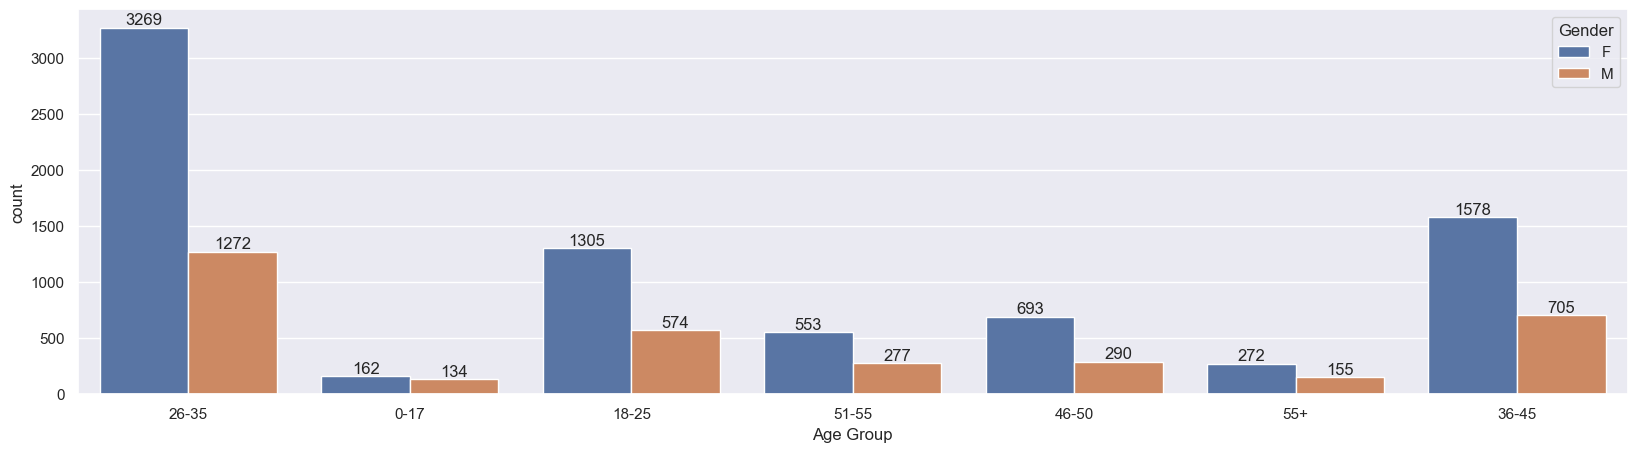

In [89]:
#AGE

ax = sns.countplot(data = df, x = 'Age Group' , hue = 'Gender' )

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

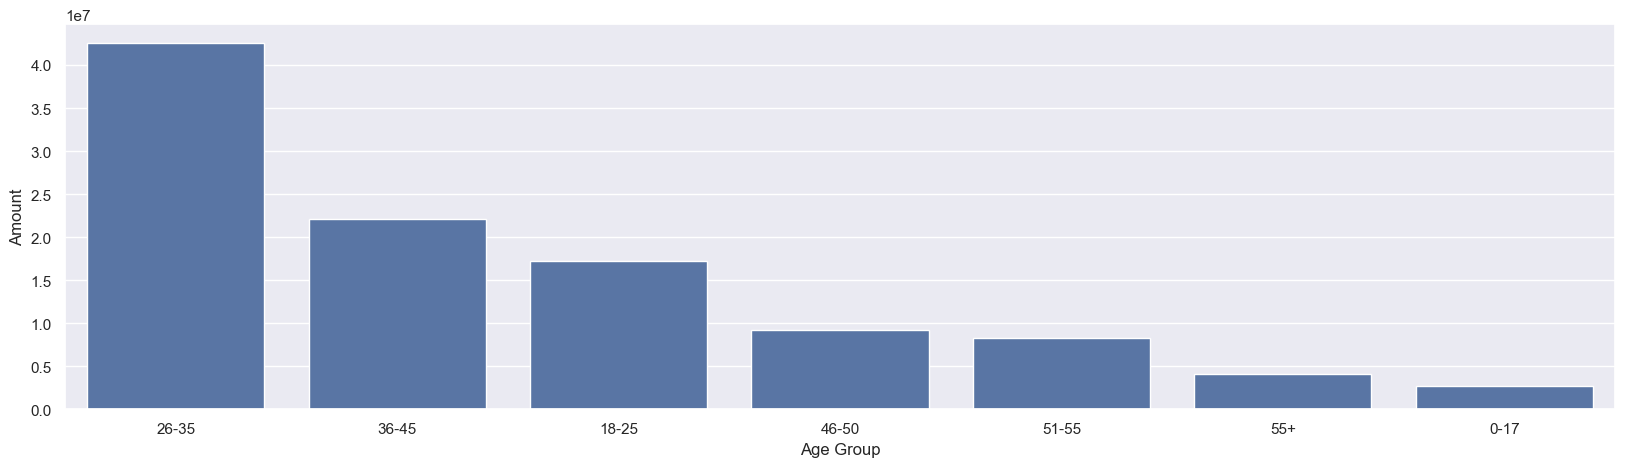

In [90]:
# Total Amount vs Age Group

sales_age  = df.groupby(['Age Group' ], as_index=False)['Amount'].sum().sort_values(by='Amount' , ascending=False)
sns.barplot(x = 'Age Group' ,y= 'Amount' ,data = sales_age)

In [91]:
#f from above graphs we can see that most of the buyers are of age group between 26-35 yrs femaleS

In [92]:
# State

df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

<Axes: xlabel='State', ylabel='Orders'>

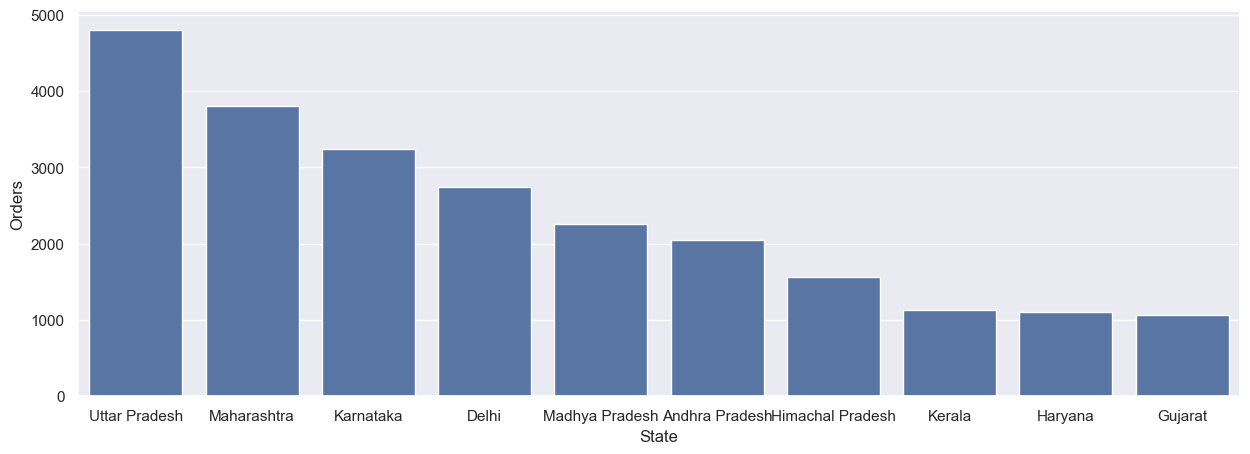

In [93]:

sales_state  = df.groupby(['State' ], as_index=False)['Orders'].sum().sort_values(by='Orders' , ascending=False).head(10)

sns.set(rc={'figure.figsize' :(15,5)})
sns.barplot(x = 'State' ,y= 'Orders' ,data = sales_state)

In [94]:
#from above graph most of the orders from Uttarpradesh, Maharastra and Karnataka

In [95]:
# Marital Status


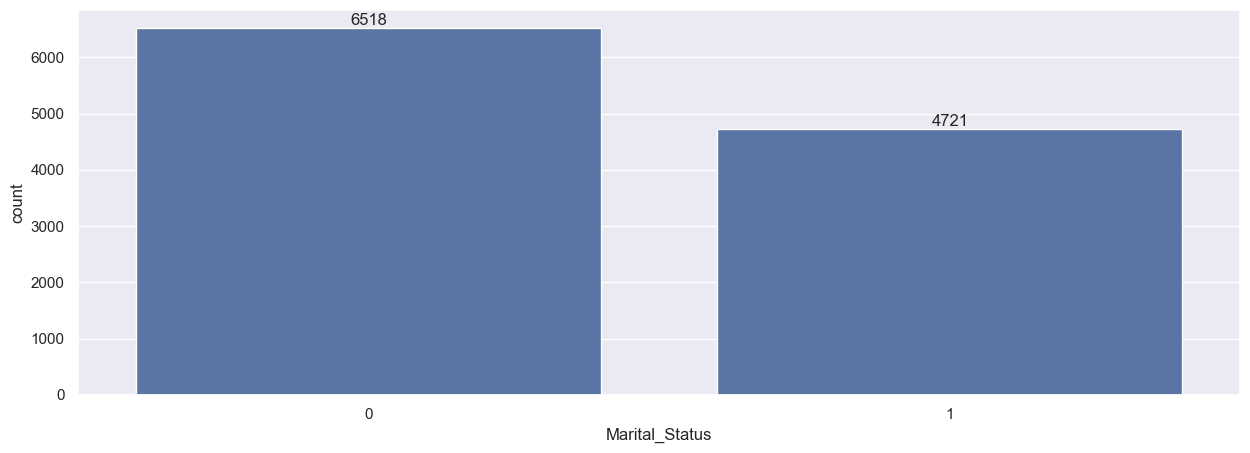

In [96]:
ax = sns.countplot(data = df, x = 'Marital_Status' )

sns.set(rc={'figure.figsize' :(7,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

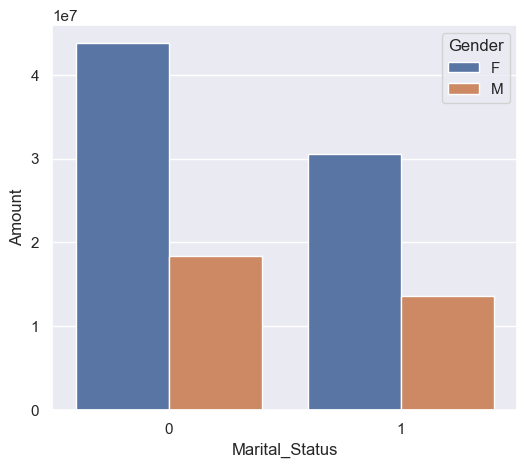

In [97]:

sales_state  = df.groupby(['Marital_Status' , 'Gender' ], as_index=False)['Amount'].sum().sort_values(by='Amount' , ascending=False)

sns.set(rc={'figure.figsize' :(6,5)})
sns.barplot(x = 'Marital_Status' ,y= 'Amount' ,data = sales_state , hue= 'Gender' )

In [98]:
#from above graphs we can see that most of the buyers are married women

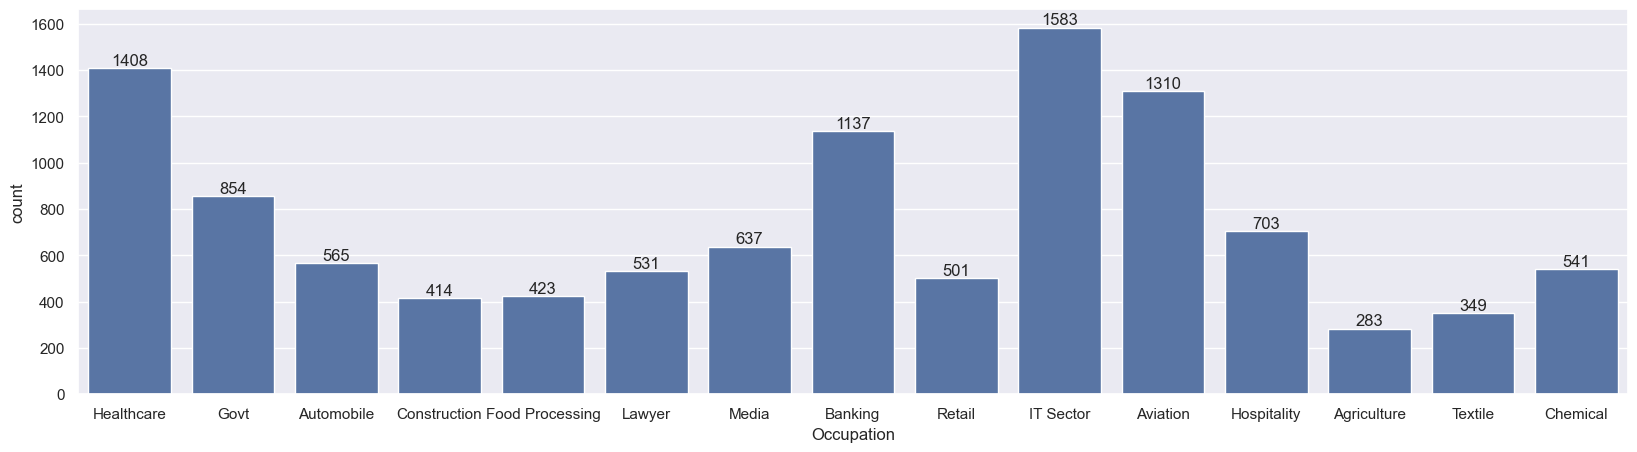

In [108]:
#Occupation
ax = sns.countplot(data = df, x = 'Occupation' )

sns.set(rc={'figure.figsize' :(25,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

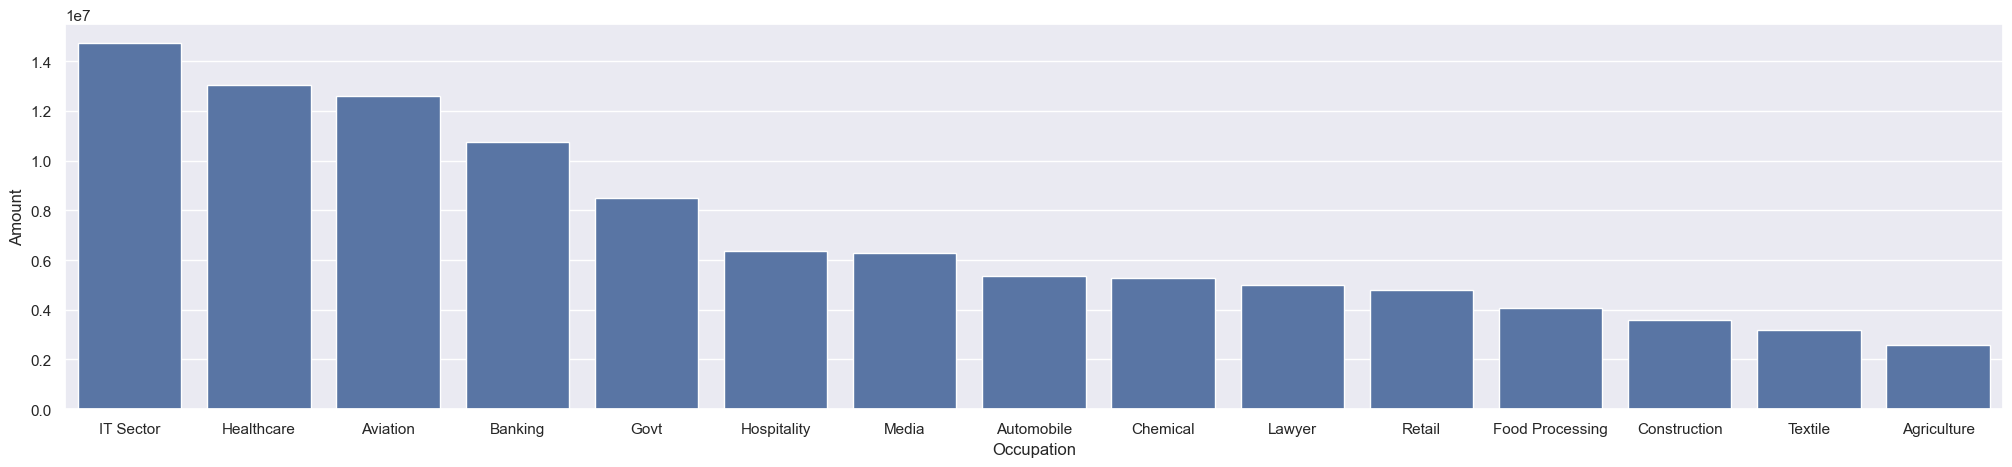

In [100]:

sales_state  = df.groupby(['Occupation' ], as_index=False)['Amount'].sum().sort_values(by='Amount' , ascending=False)

sns.set(rc={'figure.figsize' :(25,5)})
sns.barplot(x = 'Occupation' ,y= 'Amount' ,data = sales_state )

In [101]:
#from graphs most of the are working in IT, Healthcare and Aviation

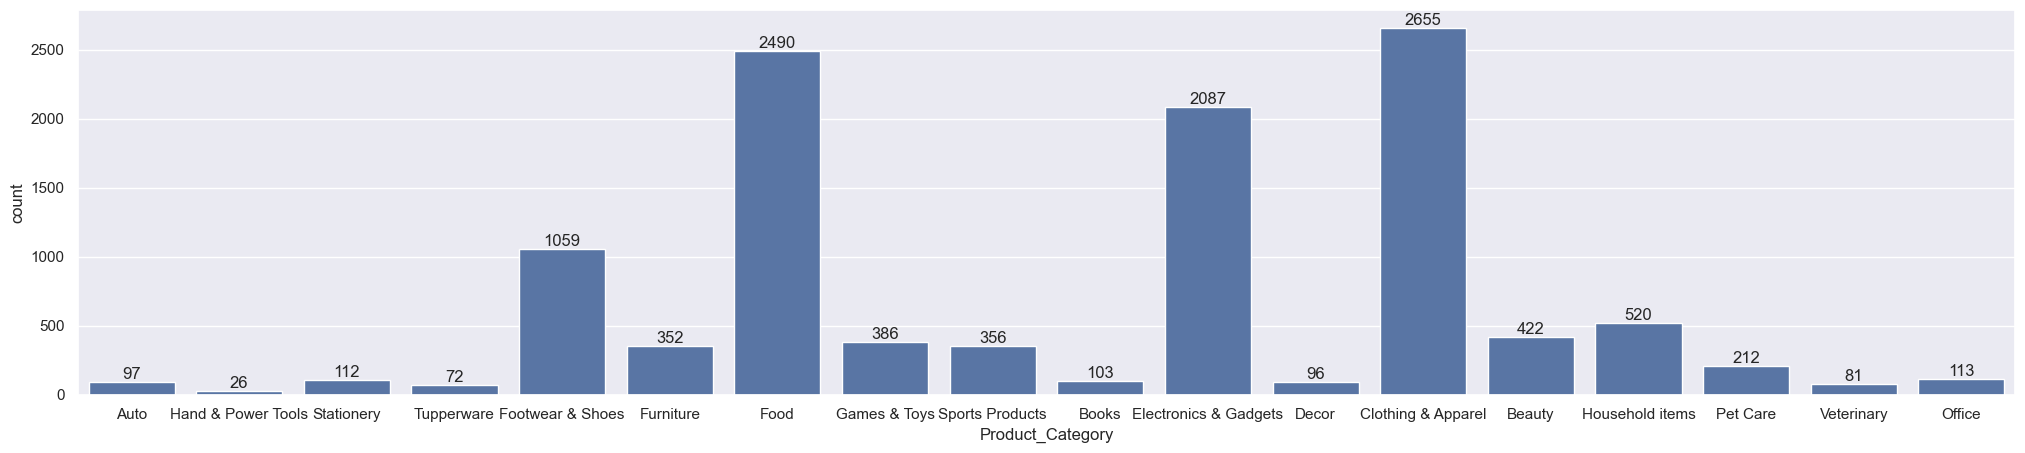

In [102]:
# Product Category
ax = sns.countplot(data = df, x = 'Product_Category' )

sns.set(rc={'figure.figsize' :(25,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

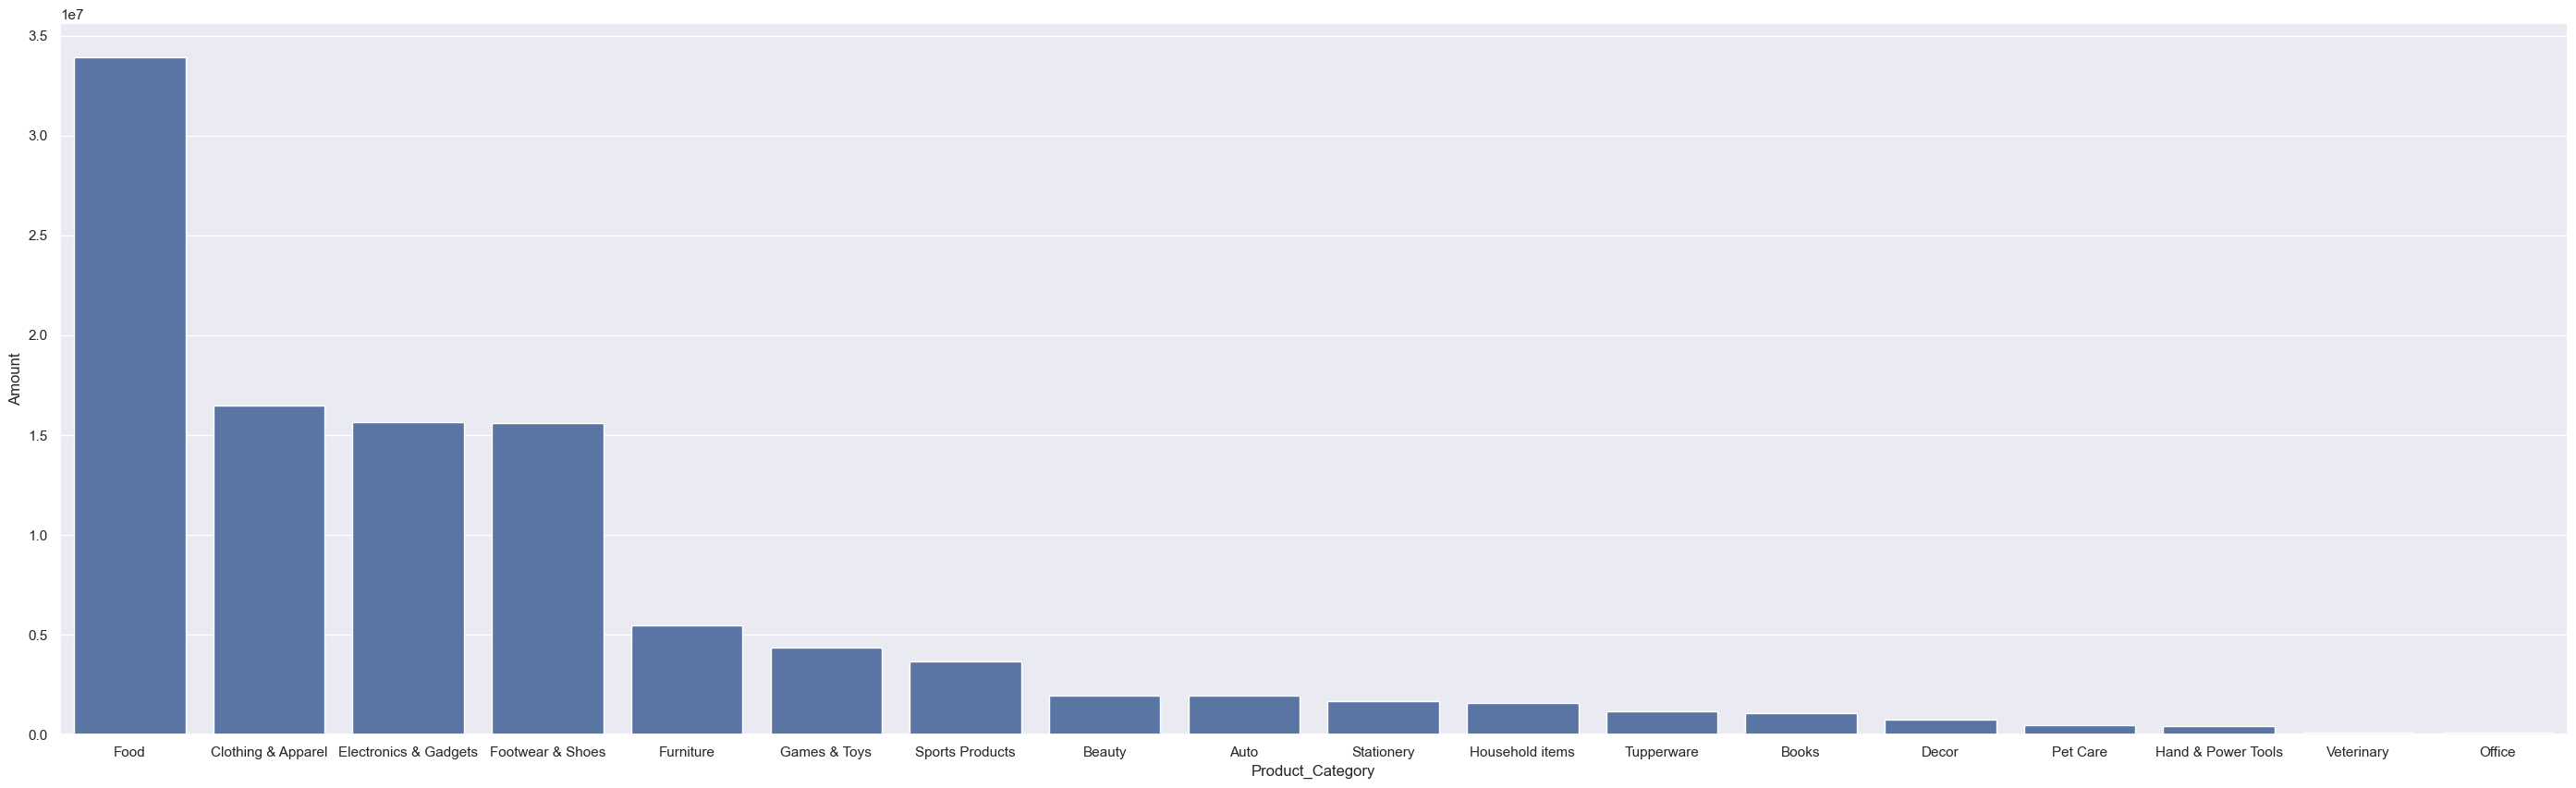

In [103]:

sales_state  = df.groupby(['Product_Category' ], as_index=False)['Amount'].sum().sort_values(by='Amount' , ascending=False)

sns.set(rc={'figure.figsize' :(35,10)})
sns.barplot(x = 'Product_Category' ,y= 'Amount' ,data = sales_state )

In [104]:
# from above graphs we can see thar most of the sold products are food, clothing and Electronics category

In [105]:
# product ID


<Axes: xlabel='Product_ID', ylabel='Orders'>

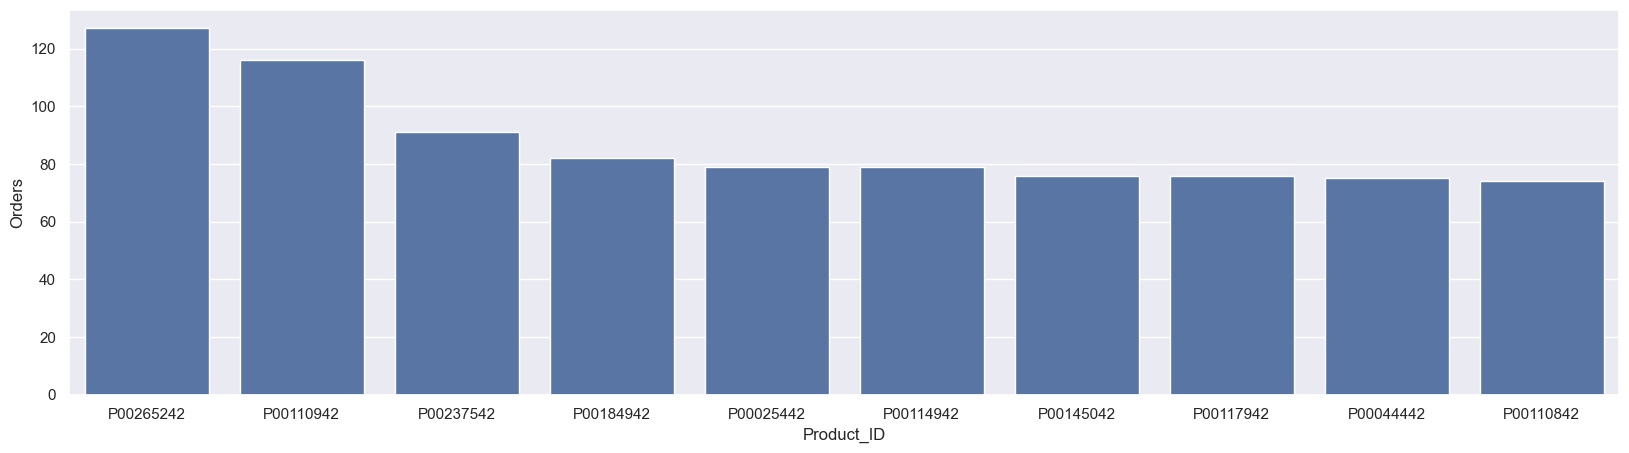

In [106]:

sales_state  = df.groupby(['Product_ID' ], as_index=False)['Orders'].sum().sort_values(by='Orders' , ascending=False).head(10)

sns.set(rc={'figure.figsize' :(20,5)})
sns.barplot(x = 'Product_ID' ,y= 'Orders' ,data = sales_state)

In [107]:
#Conclusion
# Married women age group 26-35 years from UP,Maharastra and Karnataka working in IT, Healthcare and Aviation are most likely to buy products  food, clothing and Electronics category.